# CHALLENGE 1 - Visualizing Dataset

In [50]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
data = pd.read_csv("GDP-Life Expectancy.csv")
data

,Country,PPP Adjusted GDP,Population,Life Expectancy
0,Australia,1.356210e+12,NaN,82.748780
1,Belgium,6.305280e+11,1.148406e+07,81.595122
2,Brazil,3.229060e+12,2.110495e+08,75.672000
3,Canada,1.929900e+12,3.758926e+07,81.948780
4,China,2.352340e+13,1.397715e+09,76.704000
5,France,3.315120e+12,6.705989e+07,82.724390
6,Germany,4.678570e+12,NaN,80.892683
7,India,9.560220e+12,1.366418e+09,69.416000
8,Indonesia,3.338140e+12,2.706256e+08,71.509000
9,Italy,2.668050e+12,6.029740e+07,83.346341


In [4]:
#Q1 Filling missing values in Population column

#Find population columns missing
empty_data = data[data["Population"].isnull()]
list_country = list(empty_data["Country"])
list_country

#Find those countries in Population csv data
population_data = pd.read_csv("Population.csv")
population_data["Country Name"] = population_data["Country Name"].astype('string')


countries_null_pop = population_data
population_data_values = []

for name in list_country:
  print(name)
  if name in population_data["Country Name"].values:
    print("yes")
    #Fetch row of data
    row_data = population_data.loc[(population_data["Country Name"] == name)]
    #change to list to clean data
    row_list = row_data['2019'].to_list()
    population_data_values.append([name,row_list])
       
#Now have the needed population data, to add to GDP- Life expectancy table
population_data_values = pd.DataFrame(population_data_values, columns=['Country', 'Population'])
population_data_values['Population'] = population_data_values['Population'].astype("string")
# def clean_data(x):
#   return x.str.split(" ")[1]
# population_data_values.apply(clean_data)
population_data_values["Population"] = population_data_values["Population"].str.strip().str.replace('[', '').str.replace(']','')
population_data_values




Australia
yes
Germany
yes
Netherlands
yes
Saudi Arabia
yes
Thailand
yes
Turkey
yes


C:\Users\vodde\AppData\Local\Temp\ipykernel_15400\1233273909.py:32: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  population_data_values["Population"] = population_data_values["Population"].str.strip().str.replace('[', '').str.replace(']','')


,Country,Population
0,Australia,25364307.0
1,Germany,83132799.0
2,Netherlands,17332850.0
3,Saudi Arabia,34268528.0
4,Thailand,69625582.0
5,Turkey,83429615.0


In [5]:
#replace each nan value from list of values
index = 0

#Find each row

# empty_data = empty_data.fillna(value=200)
# empty_data
print(type(population_data_values))
#Merge on country names, keeping left table format
new_data = data.merge(population_data_values, on='Country', how='left')

#now change population data y to data x
new_data['Population_x'] = new_data['Population_x'].fillna(new_data['Population_y'])
#Clean rest of unneeded columns now
new_data = new_data.drop('Population_y', axis=1)
new_data.rename(columns={'Population_x': 'Population'}, inplace=True)
new_data

    

<class 'pandas.core.frame.DataFrame'>


,Country,PPP Adjusted GDP,Population,Life Expectancy
0,Australia,1.356210e+12,25364307.0,82.748780
1,Belgium,6.305280e+11,11484060.0,81.595122
2,Brazil,3.229060e+12,211049530.0,75.672000
3,Canada,1.929900e+12,37589260.0,81.948780
4,China,2.352340e+13,1397715000.0,76.704000
5,France,3.315120e+12,67059890.0,82.724390
6,Germany,4.678570e+12,83132799.0,80.892683
7,India,9.560220e+12,1366417750.0,69.416000
8,Indonesia,3.338140e+12,270625570.0,71.509000
9,Italy,2.668050e+12,60297400.0,83.346341


In [10]:
#Q2 GDP Per Capita Column
#Change population to float, matching GDP column
new_data["Population"] = new_data["Population"].astype("float")
new_data["GDP Per Capita"] = new_data["PPP Adjusted GDP"]/new_data["Population"]
new_data

,Country,PPP Adjusted GDP,Population,Life Expectancy,GDP Per Capita
0,Australia,1.356210e+12,2.536431e+07,82.748780,53469.231389
1,Belgium,6.305280e+11,1.148406e+07,81.595122,54904.624323
2,Brazil,3.229060e+12,2.110495e+08,75.672000,15300.010381
3,Canada,1.929900e+12,3.758926e+07,81.948780,51341.792842
4,China,2.352340e+13,1.397715e+09,76.704000,16829.897368
5,France,3.315120e+12,6.705989e+07,82.724390,49435.213807
6,Germany,4.678570e+12,8.313280e+07,80.892683,56278.268701
7,India,9.560220e+12,1.366418e+09,69.416000,6996.557239
8,Indonesia,3.338140e+12,2.706256e+08,71.509000,12334.902426
9,Italy,2.668050e+12,6.029740e+07,83.346341,44248.176538


0       2.536431
1       1.148406
2      21.104953
3       3.758926
4     139.771500
5       6.705989
6       8.313280
7     136.641775
8      27.062557
9       6.029740
10     12.626493
11     12.757553
12      1.733285
13     20.096360
14      3.797087
15     14.437354
16      3.426853
17      5.170910
18      4.707678
19      1.028545
20      0.857483
21      6.962558
22      8.342961
23      6.683440
24     32.823952
Name: Population, dtype: float64
['Australia', 'Belgium', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Nigeria', 'Poland', 'Russia', 'Saudi Arabia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'United Kingdom', 'United States']


C:\Users\vodde\AppData\Local\Temp\ipykernel_15400\3685429778.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(x=new_data["GDP Per Capita"], y=new_data["Life Expectancy"],s=scaled_population, c= range(25), cmap=cm.get_cmap('viridis'))


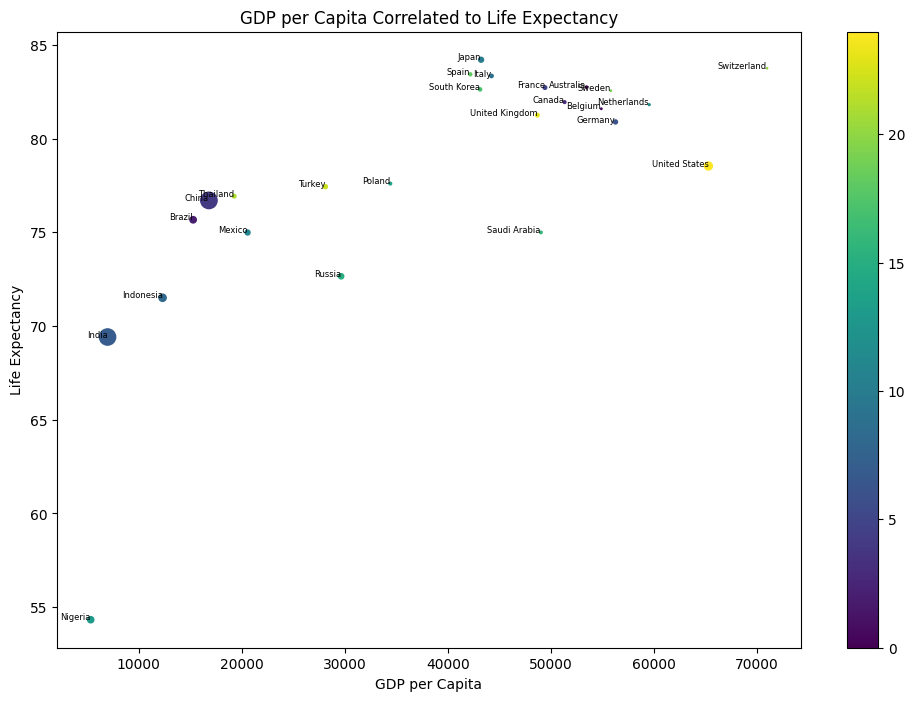

In [74]:
#Q3 Plotting in Matplotlib

#Scaling of Population data to use as values in scatter points density
def divide_by_7_zero(x):
  return x/10000000

scaled_population = new_data["Population"].apply(divide_by_7_zero)
print(scaled_population)

plt.figure(figsize=(12,8))
#Scatter plot with 25 different colors
scatter = plt.scatter(x=new_data["GDP Per Capita"], y=new_data["Life Expectancy"],s=scaled_population, c= range(25), cmap=cm.get_cmap('viridis'))
plt.title("GDP per Capita Correlated to Life Expectancy")
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.colorbar()


list_of_country = new_data["Country"].tolist()
print(list_of_country)
num = 0
#Loop through each point, and plot corresponding country name
for (i, j) in zip(new_data["GDP Per Capita"], new_data["Life Expectancy"]):
    plt.text(i, j, f'{list_of_country[num]}', fontsize=6, ha='right')
    num += 1


plt.show()